In [34]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [12]:
print(np.max(np.max(train_data)))
np.max(np.max(test_data))

9995


9927

In [13]:
word_index = imdb.get_word_index()
reverse_word_index  = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 0s 0us/step


In [15]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [18]:
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence :
      results[i,j] = 1
    return results
X_train= vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
y_train = np.asanyarray(train_labels).astype("float32")
y_test = np.asanyarray(test_labels).astype("float32")

In [27]:
model = keras.Sequential([
    layers.Dense(16,activation= "relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [29]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [30]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/30
30/30 [==============================] - 6s 187ms/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2/30
30/30 [==============================] - 3s 106ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 3/30
30/30 [==============================] - 4s 142ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 4/30
30/30 [==============================] - 5s 153ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 5/30
30/30 [==============================] - 2s 55ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 6/30
30/30 [==============================] - 2s 53ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/30
30/30 [==============================] - 2s 53ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 8/3

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

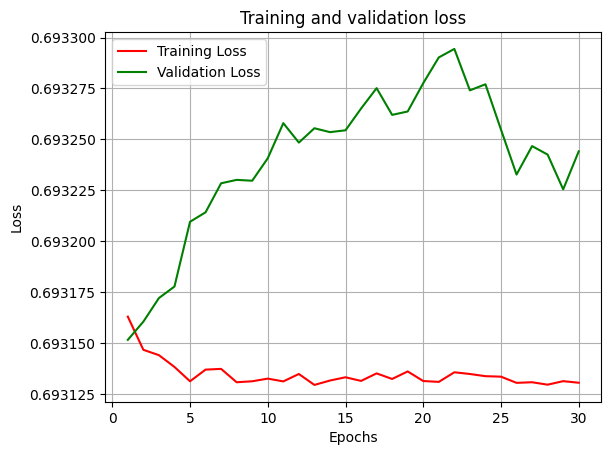

In [37]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,label="Training Loss",color="red")
plt.plot(epochs,val_loss_values,label="Validation Loss",color="green")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid();

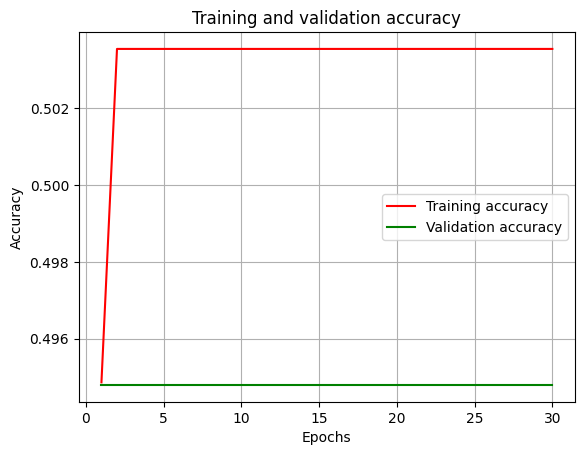

In [38]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc,label="Training accuracy",color="red")
plt.plot(epochs,val_acc,label="Validation accuracy",color="green")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid();